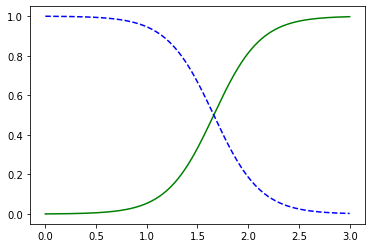

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Iris-Virginica 아님")

In [4]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [7]:
X = iris["data"][:, (2, 3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C= 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pr = pd.read_csv('prep 합친거.csv')
pr

,year,std_total,std_exp,hiv,smoke,drink,stress,depress,sex_frequency,contraception,abortion,obesity,teen_crime,tuberculosis,pre_puberty,single,private_edu,exercise3_week,basic_livelihood_security_recipient,culture_fac,welfare_fac,sports_fac,park,doctor,internet,spam_email,spam_text,rainy,tropical,heat,temp_avg,temp_low,temp_high,per_capita_income,consumer_price_index,gini,cosmetic
0,2000,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,79.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12261,66.572,NaN,NaN
1,2001,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2875.0,NaN,NaN,NaN,NaN,1419995.0,NaN,NaN,NaN,NaN,NaN,56.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11563,69.279,NaN,NaN
2,2002,0.028,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2345.0,NaN,NaN,NaN,NaN,1351185.0,NaN,NaN,NaN,NaN,NaN,59.4,NaN,NaN,104.7,3.2,5.9,12.6,7.8,18.1,13164,71.193,NaN,NaN
3,2003,0.021,NaN,6,NaN,NaN,NaN,NaN,NaN,84.5,NaN,NaN,NaN,2251.0,NaN,NaN,NaN,NaN,1374405.0,2.24,2.24,90.04,NaN,NaN,65.5,NaN,NaN,120.2,1.4,1.6,12.5,8.0,17.7,14669,73.695,NaN,NaN
4,2004,0.014,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2217.0,NaN,NaN,NaN,NaN,1424088.0,2.41,2.52,85.77,NaN,NaN,70.2,NaN,NaN,100.9,4.6,16.0,13.2,8.2,19.0,16506,76.341,NaN,NaN
5,2005,0.009,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2258.0,NaN,8.6,NaN,32.5,1513352.0,2.66,3.21,87.54,NaN,NaN,72.8,NaN,NaN,102.2,5.7,10.6,12.3,7.6,17.9,19399,78.444,NaN,NaN
6,2006,0.006,0.13,13,12.8,28.6,46.5,41.4,5.1,79.6,NaN,5.9,NaN,2537.0,NaN,8.8,NaN,31.9,1534950.0,2.92,4.05,88.11,NaN,NaN,74.1,NaN,NaN,103.6,5.7,14.4,12.9,8.3,18.3,21727,80.202,NaN,NaN
7,2007,0.006,0.12,17,13.3,27.8,46.5,41.3,5.2,NaN,NaN,5.3,NaN,2611.0,NaN,8.9,77.0,29.9,1549848.0,3.29,4.81,92.96,NaN,2.10,75.5,0.90,0.26,113.6,7.0,9.8,13.2,8.7,18.7,24088,82.235,NaN,"4,356,287"
8,2008,0.006,0.11,20,12.8,24.5,43.7,38.8,5.1,NaN,NaN,5.3,18.03,2256.0,NaN,9.0,75.1,31.8,1529939.0,3.51,6.54,102.16,10.3,2.23,76.5,0.23,0.08,101.2,6.6,12.5,12.9,8.2,18.5,21340,86.079,NaN,"5,104,830"
9,2009,0.005,0.10,27,12.8,21.1,43.2,37.5,5.1,80.0,NaN,5.1,17.33,2421.0,NaN,9.1,75.0,31.6,1568533.0,4.08,8.37,108.19,8.1,2.31,77.2,0.12,0.06,105.5,2.9,4.2,13.0,8.2,18.6,19152,88.452,NaN,"5,534,176"


In [11]:
welfac = pr['welfare_fac']
welfac
from sklearn import impute
imputer = impute.KNNImputer(n_neighbors=2)
welfac_new = imputer.fit_transform(welfac)


AttributeError: module 'sklearn.impute' has no attribute 'KNNImputer'